### 선형 회귀(Linear Regression) 모델 구현하기
* 플레이스 홀더를 선언 후, 그래프 실행시에 데이터를 입력받아, 연산 수행

### 2-1. 라이브러리 불러오기 및 데이터 지정

In [4]:
from IPython.display import display, Image

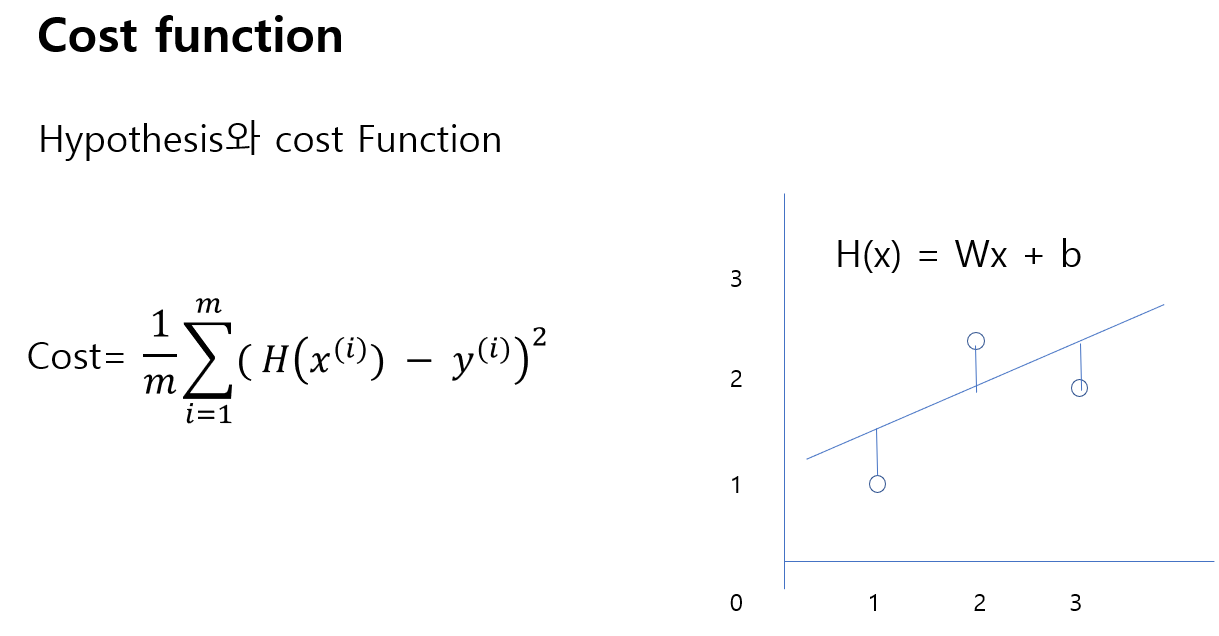

In [5]:
display(Image(filename='../img/TF_Regression01.png'))

In [6]:
import tensorflow as tf

### 학습을 위한 데이터 지정

In [7]:
x_data = [1,2,3,4,5]
y_data = [10,20,30,40,50]

### 2.2 W와 b를 각각 -1~1 사이의 균등분포(uniform distributiion)를 가진 무작위값으로 초기화수행
* 가중치(Weight)와 Bias를 임의의 값(-1 ~ 1)으로 초기화
* tf.random_uniform(shape, minval=0, maxval=None, dtype=tf.float32, seed=None, name=None) : 균등 분포로 부터 난수값 발생.

In [8]:
W = tf.Variable(tf.random_uniform( [1], -1.0, 1.0) )
b = tf.Variable(tf.random_uniform( [1], -1.0, 1.0) )
print(W)
print(b)

<tf.Variable 'Variable:0' shape=(1,) dtype=float32_ref>
<tf.Variable 'Variable_1:0' shape=(1,) dtype=float32_ref>


### 2.3 플레이스 홀더(placeholder) 설정(이름 지정 - name)
* 플레이스 홀더는 나중에 데이터를 할당되는 심플한 변수이다.
* 데이터 없이도 텐서 그래프의 작성이 가능하다.
* feed_dict에 의해 나중에 값을 정의할 수 있다.
* 배열, matrix, 몇몇의 숫자 등의 다양한 형태의 값을 가질 수 있다.
* None은 임의의 행의 데이터를 가르킨다. 

In [9]:
T = tf.placeholder(tf.float32)
print(T)

Tensor("Placeholder:0", dtype=float32)


In [10]:
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')

print(X)
print(Y)

Tensor("X:0", dtype=float32)
Tensor("Y:0", dtype=float32)


### 2-4 선형관계 수식 작성

In [11]:
# 선형관계의 수식을 작성.
# W : 가중치(Weight), b : 편향(bias)
hypothesis = W * X + b

In [12]:
# hypothesis = W * X + b

### 2-5 손실함수(loss function)
 * 우리는 나중에 학습시에 Loss를 최소화하는 W와 b의 값을 구하게 된다.
 * 데이터에 대한 손실값을 계산하는 함수
 * 손실값이란 실제값과 모델이 예측한 값이 얼마나 차이가 나는가를 나타내는 값.
 * 손실값이 적을 수록 모델이 주어진 X값에 대한 Y값을 정확하게 예측할 수 있다라는 의미
 * 손실을 전체 데이터에 대해 구한 경우 이를 비용(cost)이라 한다.

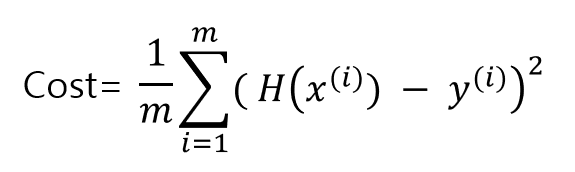

In [15]:
display(Image(filename='../img/TF_Regression02.png'))

### 식을 만들기

In [16]:
# hypothesis(예측) - Y(실제)
# tf.square(예측과실제의차이) -> 제곱
# tf.reduce_mean(a) -> a의 평균
cost = tf.reduce_mean(tf.square(hypothesis - Y))
cost

<tf.Tensor 'Mean:0' shape=() dtype=float32>

### 2-6 최적화 함수(경사하강법)
 * **경사하강법** : 함수의 기울기를 구하고, 기울기가 낮은 쪽으로 계속 이동시키면서 최적의 값을 찾아 나간다.(즉 손실값을 낮춰가며, 계속 최적의 값을 찾아간다.)
 * 경사하강법(gradient descent)는 최적화 방법 중 가장 기본적인 알고리즘이다.
 * 최적화 함수란 가중치(w)와 편향(b)을 변경해 가면서 손실값을 최소화시키는 가장 최적화된 가중치와 편향값을 찾아주는 함수.
 * learning_rate는 학습을 얼마나 급하게 할 것인가를 설정하는 값

In [17]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train_op = optimizer.minimize(cost)
train_op

<tf.Operation 'GradientDescent' type=NoOp>

* 학습을 진행하는 과정 중에 영향을 주는 변수를 **하이퍼파라미터(hyperparameter)**라 한다.  이에 따라 학습속도와 신경망 성능이 달라질 수 있다

#### with를 이용하여 세션 블록(세션영역)을 생성
* 출력 순서
* step : 단계
* cost_val : cost 비용
* sess.run(W) : 가중치 값
* sess.run(b) : 편향 값

In [19]:
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  
  for step in range(100):
    _, cost_val = sess.run([train_op, cost], feed_dict={X:x_data, Y:y_data})
    print(step, "Cost = %-10.5f" % cost_val, end=" ")
    print("W = %10.6f" % sess.run(W), end=" ")
    print("B = %10.6f " % sess.run(b), end="\n")

0 Cost = 987.66052  W =   2.406130 B =   1.311109 
1 Cost = 576.31610  W =   3.998115 B =   1.740519 
2 Cost = 336.59995  W =   5.214098 B =   2.065822 
3 Cost = 196.90007  W =   6.143047 B =   2.311660 
4 Cost = 115.48491  W =   6.852877 B =   2.496844 
5 Cost = 68.03518   W =   7.395433 B =   2.635734 
6 Cost = 40.37886   W =   7.810294 B =   2.739293 
7 Cost = 24.25718   W =   8.127672 B =   2.815890 
8 Cost = 14.85735   W =   8.370631 B =   2.871912 
9 Cost = 9.37473    W =   8.556778 B =   2.912236 
10 Cost = 6.17489    W =   8.699553 B =   2.940584 
11 Cost = 4.30538    W =   8.809216 B =   2.959800 
12 Cost = 3.21116    W =   8.893600 B =   2.972051 
13 Cost = 2.56875    W =   8.958685 B =   2.978994 
14 Cost = 2.18969    W =   9.009034 B =   2.981893 
15 Cost = 1.96411    W =   9.048133 B =   2.981713 
16 Cost = 1.82801    W =   9.078641 B =   2.979190 
17 Cost = 1.74408    W =   9.102589 B =   2.974888 
18 Cost = 1.69059    W =   9.121526 B =   2.969235 
19 Cost = 1.65487    W

### 생각해 보기
 * 만약 for문을 계속 반복시켜가면 W의 값은 어떤 값에 가까워질까?

### 2-7 학습 후, 결과값 확인하기

In [13]:
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  
  for step in range(1001):
    _, cost_val = sess.run([train_op, cost], feed_dict={X:x_data, Y:y_data})
    if step%10==0:
      print(step, cost_val, sess.run(W), sess.run(b))
  
  print()
  print("최종 학습된 결과로 예측해 보기")
  print("Y = {Weight} * X + {Bias} ".format(Weight=sess.run(W), Bias=sess.run(b)))
  print("X:5, Y:", sess.run(hypothesis, feed_dict={X:5}))
  print("X:2.5, Y:", sess.run(hypothesis, feed_dict={X:2.5}))


0 1086.6752 [2.071835] [1.2386663]
10 6.642415 [8.672422] [2.95255]
20 1.6505979 [9.142491] [2.9721873]
30 1.5219158 [9.199667] [2.8811414]
40 1.4221544 [9.228242] [2.785733]
50 1.3290131 [9.25407] [2.6930044]
60 1.2419746 [9.278919] [2.60333]
70 1.1606374 [9.302931] [2.5166397]
80 1.0846274 [9.326143] [2.4328358]
90 1.0135926 [9.348583] [2.3518229]
100 0.94721144 [9.3702755] [2.273507]
110 0.8851782 [9.391245] [2.1978]
120 0.8272082 [9.411516] [2.124614]
130 0.773033 [9.431112] [2.0538647]
140 0.722408 [9.450056] [1.9854717]
150 0.6750964 [9.4683695] [1.9193556]
160 0.63088334 [9.486073] [1.8554412]
170 0.58956724 [9.503185] [1.7936556]
180 0.5509545 [9.51973] [1.7339272]
190 0.51487255 [9.535723] [1.6761878]
200 0.4811532 [9.551183] [1.6203711]
210 0.449642 [9.566129] [1.5664132]
220 0.42019424 [9.580576] [1.514252]
230 0.39267734 [9.5945425] [1.4638278]
240 0.36695927 [9.608045] [1.4150825]
250 0.342927 [9.621097] [1.3679605]
260 0.32046962 [9.633714] [1.322408]
270 0.2994816 [9.645